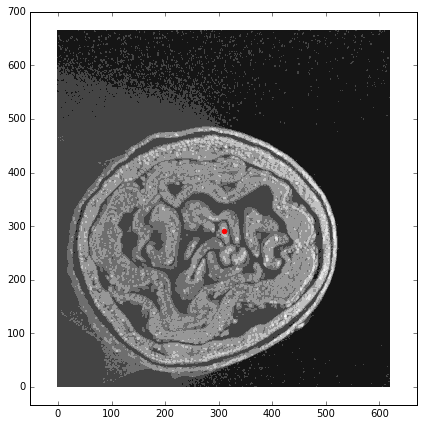

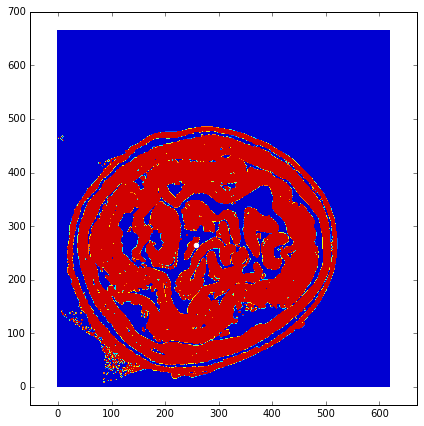

In [51]:
# calculate center of intensities
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.cluster import KMeans
from scipy import ndimage
from skimage.measure import moments
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

# open first image to get the image dimensions
im1 = np.array(Image.open('sargentii_17/batch3_tomo_areaij_sample17.0443.tif'),dtype=np.double)
im2 = np.array(Image.open('sargentii_17/batch3_tomo_areaij_sample17.0677.tif'),dtype=np.double)


clustered_img1 = KMeans(2).fit_predict(im1.reshape([np.prod(np.shape(im1)),1]))            
clustered_img1[clustered_img1 == clustered_img1[0]] = 2e0
clustered_img1[clustered_img1 != clustered_img1[0]] = 3e0
clustered_img1[clustered_img1 == 2e0] = 0e0
clustered_img1[clustered_img1 == 3e0] = 1e0

clustered_img1 = clustered_img1.reshape(np.shape(im1))
clustered_img1 = np.array(clustered_img1,dtype=np.double)


clustered_img2 = KMeans(2).fit_predict(im2.reshape([np.prod(np.shape(im2)),1]))            
clustered_img2[clustered_img2 == clustered_img2[0]] = 2e0
clustered_img2[clustered_img2 != clustered_img2[0]] = 3e0
clustered_img2[clustered_img2 == 2e0] = 0e0
clustered_img2[clustered_img2 == 3e0] = 1e0

clustered_img2 = clustered_img2.reshape(np.shape(im2))
clustered_img2 = np.array(clustered_img2,dtype=np.double)



m1 = moments(clustered_img1)
cr1 = m1[0, 1] / m1[0, 0]
cc1 = m1[1, 0] / m1[0, 0]

m2 = moments(clustered_img2)
cr2 = m2[0, 1] / m2[0, 0]
cc2 = m2[1, 0] / m2[0, 0]

m2 = moments(im2)
crI2 = m2[0, 1] / m2[0, 0]
ccI2 = m2[1, 0] / m2[0, 0]


plt.axis('equal')
plt.contourf(im2,cmap='Greys_r')
plt.scatter(crI2,ccI2,color='r')
plt.tight_layout(w_pad=0, h_pad=0)
plt.savefig('imgs/centroid_intensity.png',dpi=150)
plt.show()

plt.axis('equal')
plt.contourf(clustered_img2)
plt.scatter(cr2,cc2,color='w')
plt.tight_layout(w_pad=0, h_pad=0)
plt.savefig('imgs/centroid_clustered.png',dpi=150)
plt.show()

